<a href="https://colab.research.google.com/github/IsWallison/Projeto_Churn_Prediction/blob/main/Projeto_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [Wallison](https://www.linkedin.com/in/wallison-borges-48312516a/)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score,precision_score,recall_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


# Importar os modelos
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB




from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import LabelEncoder
import warnings

warnings.simplefilter("ignore")


Para facilitar a aquisição dos dados, criei um link com acesso direto ao csv.

CSV é a sigla para Comma Separated Values (em português, valores separados por vírgulas). Um arquivo CSV é um arquivo de texto simples que armazena informações de planilhas e tabelas. O conteúdo geralmente é uma tabela de texto, números ou datas. Os arquivos CSV podem ser facilmente importados e exportados usando programas que armazenam dados em tabelas.

Os dados serão atribuidos a variável 'df'.

In [4]:
# importar os pacotes necessários
import pandas as pd

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)

# ver as 5 primeiras entradas
df.head()



Dimensões do Conjunto Original:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Com os dados importados para dentro de uma estrutura Dataframe - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de Machine Learning.

Vamos à Análise Exploratória.

# Análise Exploratória

Vamos conferir o nome de todas as colunas através do método columns

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Vamos ver o resumo estatístico do dataframe com o auxílio da função "describe()" que é uma função comum em bibliotecas de análise de dados, ela é usada para calcular estatísticas descritivas básicas de um conjunto de dados, como média, desvio padrão, quartis e contagem.

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


A função "info()" é usada para obter informações gerais sobre um conjunto de dados, incluindo o número de linhas e colunas, o tipo de dados de cada coluna, a quantidade de valores não-nulos e memória usada.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


A coluna **costumerID** não agrega nenhuma informação, pois se trata de um identificador única para cada cliente.
A variável alvo está na coluna **Churn**, indicando a situação de churn.
A coluna **TotalCharges** deveria ser um float, mas está como string.
Faremos uma copia os dados do DataFrame original (df) para um novo DataFrame (df_clean).

In [29]:
df_clean = df.copy()
#remover os em branco 
df_clean = df.drop(df[df['TotalCharges']==' '].index,axis=0)
#Remover customerID
df_clean = df_clean.drop('customerID', axis=1)
#tranformar em numero
df_clean['TotalCharges'] = df_clean['TotalCharges'].astype(float)

Agora vamos tranformar os dados. Primeiramente, a coluna "Churn" é transformada em valores binários 0 e 1. Em seguida, um loop é utilizado para identificar as colunas que possuem apenas 2 valores únicos e essas colunas são codificadas com LabelEncoder, transformando seus valores em 0 ou 1. As colunas que possuem mais de 2 valores únicos são verificadas se possuem a categoria "Yes". Se possuírem, a coluna é codificada com 1 para "Yes" e 0 para o resto. Por fim, é criada uma nova coluna para cada uma das outras colunas que não foram codificadas anteriormente usando a função "get_dummies" do pandas.

pd.get_dummies é uma função do Pandas que realiza a codificação one-hot encoding.
O processo de codificação one-hot encoding transforma as variáveis categóricas em variáveis binárias, ou seja, cria uma coluna para cada categoria presente na variável original e preenche as colunas com 0 e 1, onde 1 indica que a observação pertence àquela categoria e 0 indica que não pertence.

In [31]:
#tranformar a coluna Churn emm 0 e 1
df_clean['Churn'] = (df_clean['Churn']== 'Yes').astype(int)
le = LabelEncoder()

#loop para codificar as colunas
for i in df_clean.columns:
  a = df_clean[f'{i}'].value_counts()

#se so tiver 2 valores transforma 0 e 1
  if len(a) == 2:
    df_clean[f'{i}'] = le.fit_transform(df_clean[f'{i}'])

#se tiver sim tranforma sim em 1 o resto em 0
  elif "Yes" in a:
    df_clean[f'{i}'] = (df_clean[f'{i}']== 'Yes').astype(int)
    
#cria uma novo coluna para os outros que nao entraram na codificação a cima
df_clean = pd.get_dummies(df_clean)
print(df_clean.info())
print(f"\nValores únicos (por coluna):\n{df_clean.nunique()}\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

Agora vamos plotar um gráfico de barras para vizualizar o balanceamento do dataset



Chrun representa 27% do dataset 



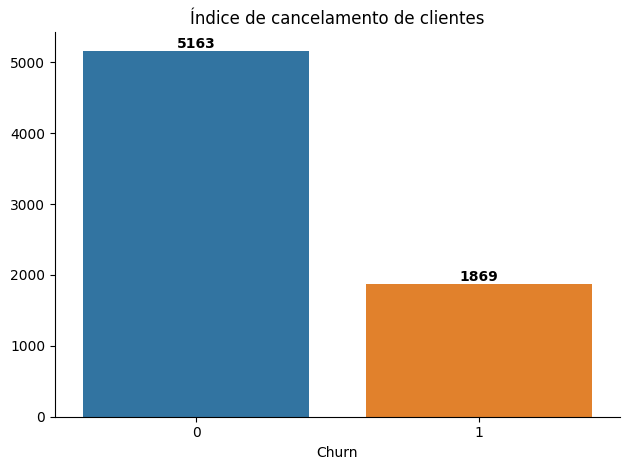

In [48]:
print(f'Chrun representa {round((sum(df_clean["Churn"]==1)/df_clean.shape[0]*100))}% do dataset \n')

fig, ax = plt.subplots();

sns.countplot(x=df_clean['Churn'],)
ax.set_title('Índice de cancelamento de clientes');
ax.set_ylabel('')
total = df_clean['Churn'].value_counts()

#Adicionar valor na barra
for i in range(2):
  alt = int(total[i])+100
  ax.text(i, i+alt, total[i], va='center', ha='center', fontweight='bold',)

#remover borda lateral e superior
def remove_spine(ax):
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  

remove_spine(ax)
plt.tight_layout()
plt.show()


# Estudar a distribuição e correlação entre os dados

vamos plotar um histograma da variável 'tenure' presente no dataframe 'df_clean'.

Um histograma é um gráfico de frequência que mostra a distribuição de frequência de um conjunto de dados contínuos. Ele divide os valores em "bins" (intervalos) e mostra a quantidade de observações que caem em cada bin. Isso permite visualizar a distribuição geral dos dados e identificar padrões ou características importantes, como a presença de outliers, a forma da distribuição (simétrica ou assimétrica) e a concentração dos dados em certos valores. O histograma mostra a distribuição da variável 'tenure', que representa o número de meses em que o cliente permaneceu na empresa de telecomunicações.

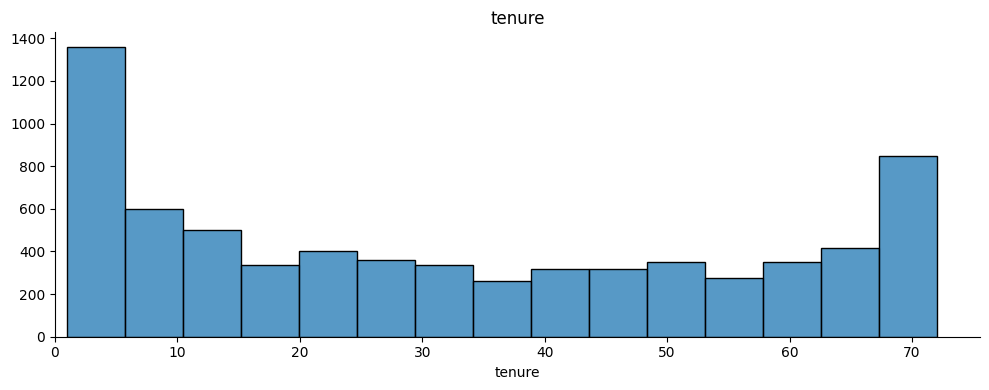

In [50]:
fig, ax = plt.subplots(figsize=(10, 4));

sns.histplot(x=df_clean['tenure'])
ax.set_title('tenure');
ax.set_ylabel('')
ax.axis(xmin=0)

remove_spine(ax)
plt.tight_layout()
plt.show()

O histograma da distribuição da variável 'TotalCharges' representa o número de total de gastos dos clientes.

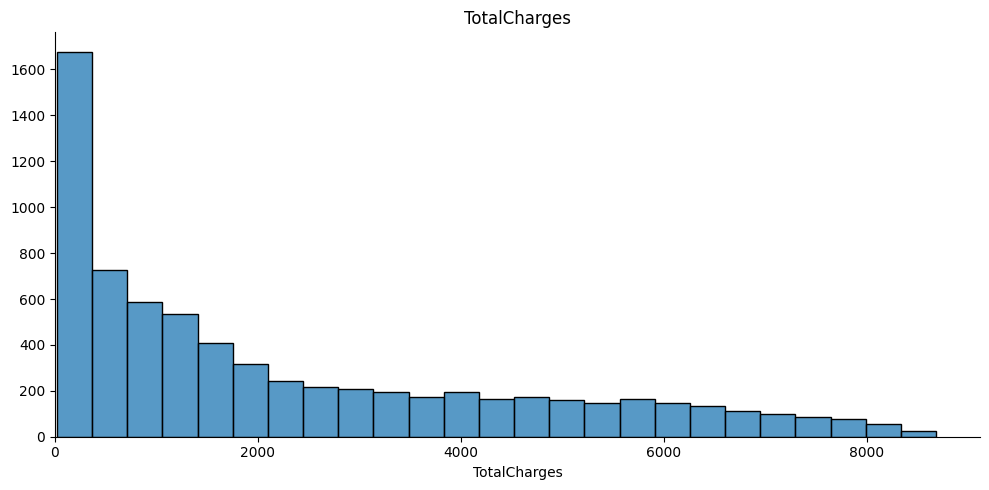

In [51]:

fig, ax = plt.subplots(figsize=(10, 5));

sns.histplot(x=df_clean['TotalCharges'])
ax.set_title('TotalCharges');
ax.set_ylabel('')
ax.axis(xmin=0)
total = df_clean['TotalCharges'].value_counts()
 

remove_spine(ax)
plt.tight_layout()
plt.show()

O código a seguir representa um gráfico de contagem (countplot) para a variável "gender" (gênero) do dataset. Cada barra representa a contagem de ocorrências para cada categoria (no caso, "Male" e "Female"). Além disso, é adicionado o valor da contagem em cima de cada barra.

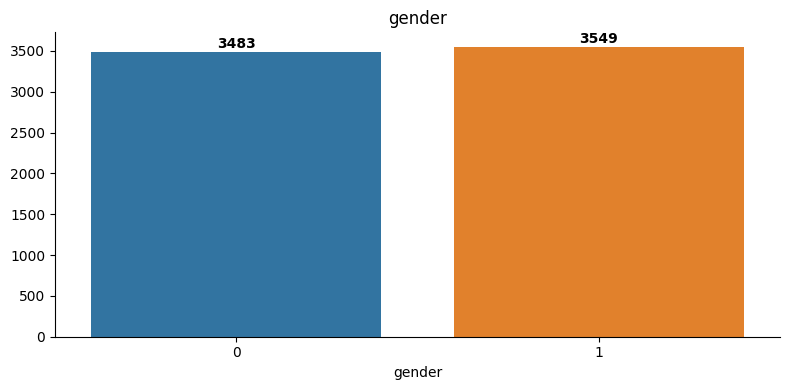

In [52]:
fig, ax = plt.subplots(figsize=(8, 4));

sns.countplot(x=df_clean['gender'])
ax.set_title('gender');
ax.set_ylabel('')
total = df_clean['gender'].value_counts()

#Adicionar valor na barra
for i in range(2):
  alt = int(total[i])+100
  ax.text(i, i+alt, total[i], va='center', ha='center', fontweight='bold',)
  
remove_spine(ax)
plt.tight_layout()
plt.show()

o código abaixo é uma visualização dos histogramas das colunas 'tenure', 'MonthlyCharges' e 'TotalCharges' do conjunto de dados. A primeira parte do código é um loop que itera sobre cada uma dessas colunas. Dentro do loop, para cada coluna, ele cria um histograma que mostra a distribuição dos valores para as amostras com "Churn" igual a 1 (cor vermelha) e 0 (cor azul). O objetivo é comparar a distribuição dos valores nessas duas subpopulações para ver se há alguma diferença evidente entre elas.

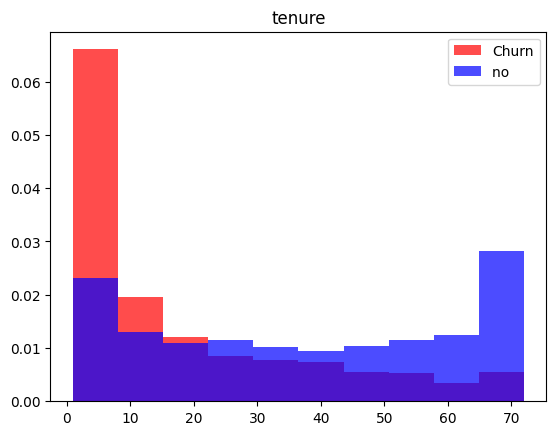

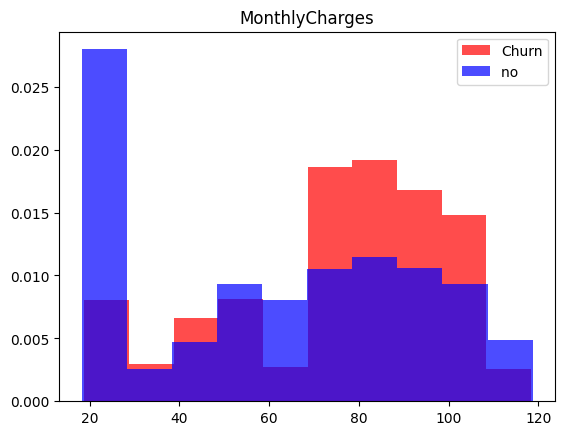

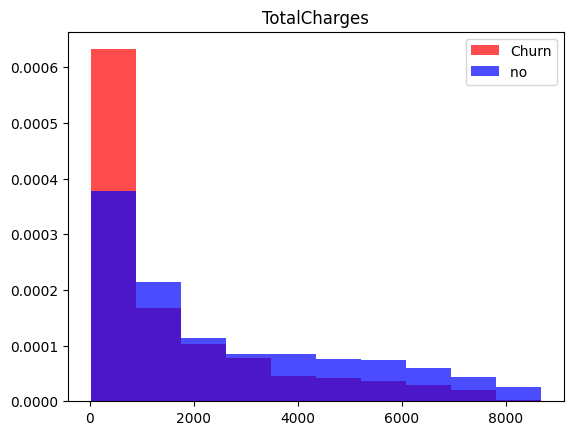

In [56]:
hist_col = ['tenure', 'MonthlyCharges','TotalCharges']

for label in hist_col:
  plt.hist(df_clean[df_clean['Churn'] == 1][label],color='red', label='Churn',alpha=0.7, density=True)
  plt.hist(df_clean[df_clean['Churn'] == 0][label],color='blue', label='no ',alpha=0.7, density=True)
  plt.title(label)
  plt.legend()
  plt.show()

Agora vamos criar um gráfico de mapa de calor (heatmap) usando a biblioteca seaborn, que mostra visualmente os valores da matriz de correlação entre as variáveis do dataset, onde cada célula indica a relação entre duas variáveis, que pode variar de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita), com 0 indicando nenhuma correlação.

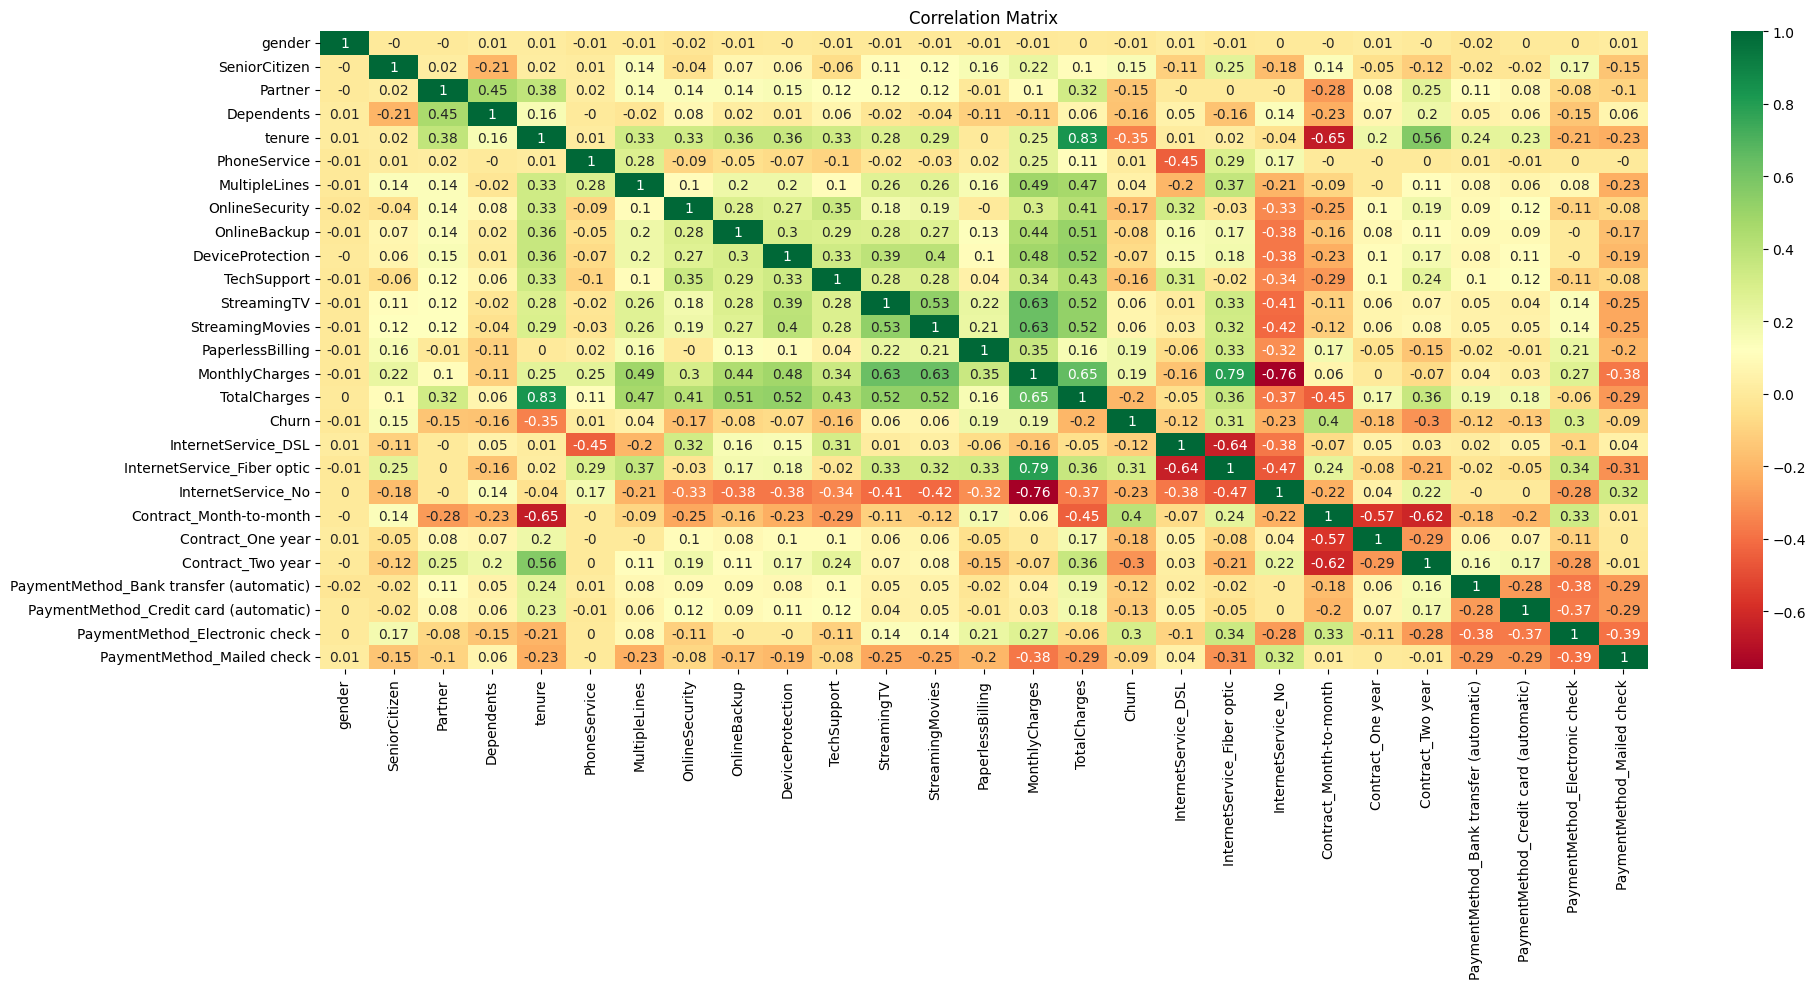

In [57]:
corr = df_clean.corr()
corr= corr.round(2)

# Create a figure and an Axes object
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the heatmap
sns.heatmap(corr, cmap='RdYlGn', annot=True, ax=ax,)

# Set the title
ax.set_title("Correlation Matrix")

# Show the plot
plt.tight_layout()
plt.show()

O código a seguir cria um gráfico de boxplot que compara a distribuição da variável "tenure" (tempo em meses que o cliente permaneceu na empresa) entre os clientes que cancelaram (Churn=1) e os que não cancelaram (Churn=0).

O gráfico tem duas caixas, uma para cada grupo, e mostra a mediana (linha central da caixa), o intervalo interquartil (caixa), os valores mínimo e máximo (linhas que se estendem para fora da caixa) e os pontos considerados outliers (bolinhas que se estendem além das linhas). O objetivo do gráfico é mostrar se há diferença significativa na distribuição da variável entre os dois grupos. 

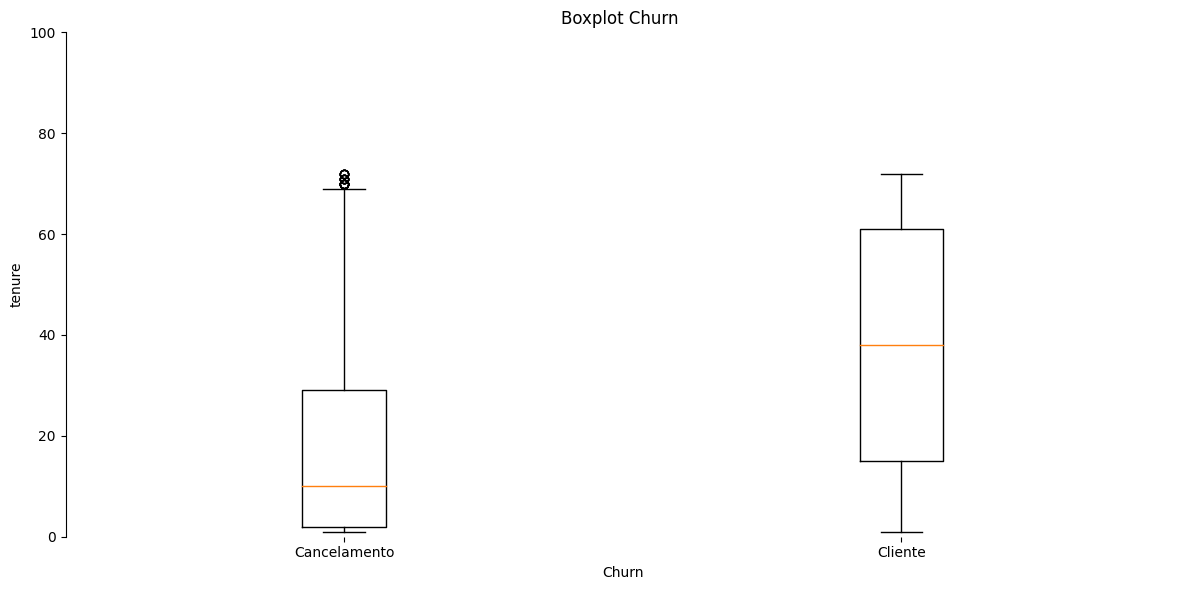

In [55]:
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(df_clean['tenure'][df_clean['Churn'] == 1], positions=[1])

# Plot the second box plot using the second dataset
ax.boxplot(df_clean['tenure'][df_clean['Churn'] == 0], positions=[2])

plt.subplots_adjust(wspace=100, hspace=-50)

ax.set_title("Boxplot Churn ")
ax.set_xlabel("Churn")
ax.set_ylabel("tenure")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])   # remove y-tick labels for the first subplot
plt.xticks([2, 1], ['Cliente', 'Cancelamento'])
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

No caso, é possível observar que a mediana da variável "tenure" para o grupo que cancelou é menor do que para o grupo que não cancelou, indicando que os clientes que cancelaram costumam permanecer menos tempo na empresa.


EXPLORAR OS DADOS
* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc
    * % de valores ausentes
    * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)
    * Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc
* Identificar a variável alvo (target)
* Visualizar os dados
* Estudar a correlação entre os dados
* Ver o balanceamento das classes
* Identificar as transformações que podem ser aplicadas
* Identificar os dados extras que podem ser úteis


PREPARAÇÃO DOS DADOS
* Limpeza dos Dados
    * Consertar ou remover outliers
    * Preencher os valores faltantes ou eliminar as linhas/colunas
        * Zero
        * Média
        * Mediana
        * Frequência
* Seleção de atributos
    * Eliminar os atributos (*features*) que não contêm informações úteis

* *Feature Engineering*
    * Discretizar variáveis contínuas
    * Decompor *features* (categóricas, data, tempo)
    * Aplicar transformações às variáveis
    * Agregar *features* para gerar novas
    
* *Feature Scaling*
    * Normalizar ou padronizar *features*

* Dividir entre treino, teste e validação

CONSTRUIR MODELO(S) DE MACHINE LEARNING
* Analisar as variáveis mais significativas para cada algoritmo
* *Hyperparameters Tuning* (se necessário)
* Uso de *cross-validation*
* Verificar o desempenho do(s) modelo(s) e considerar métodos *Ensemble*

# PREPARAÇÃO DOS DADOS
Vamos dividir o conjunto de dados entre treino e validação usando a função train_test_split. A função divide os dados em dois conjuntos, um usado para treinamento e outro usado para validação.

Estamos usando as colunas sem a coluna 'Churn' como dados de treinamento (X_train) e a coluna 'Churn' como rótulos de treinamento (y_train).



In [83]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Esse código define uma função chamada transform, que tem como objetivo treinar um modelo de classificação e avaliar sua performance em termos de precisão (accuracy), revocação (recall) e F1-score.

O modelo é treinado usando uma técnica de subamostragem aleatória (Random Under Sampling) para balancear as classes, e opcionalmente, os dados de treinamento podem ser normalizados usando uma transformação StandardScaler.

A função recebe como parâmetros um modelo de classificação já instanciado, dados de treinamento X e y, e um parâmetro opcional para indicar se os dados devem ser normalizados ou não.

Ao final da execução, a função exibe a performance média do modelo em termos de revocação, precisão e F1-score, considerando a técnica de validação cruzada (cross-validation) com o número padrão de folds (cv=5).

In [77]:
# separar variáveis entre X e y com as colunas escolhidas y vai ser ser o alvo 
def transform(modelo, X_train = X_train, y_train = y_train, scale=False):

  if scale == True:
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train) 

  rus = RandomUnderSampler()
  X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

  clf = modelo.fit(X_train_rus,y_train_rus)

  pipeline = make_pipeline(StandardScaler(), clf)
  #pipeline.fit(X_train_rus, y_train_rus)

  scores = cross_validate(pipeline, X_train_rus, y_train_rus, scoring=['recall', 'accuracy','f1'], return_train_score=True)

  mean_accuracy = np.mean(scores['test_accuracy'])
  mean_recall = np.mean(scores['test_recall'])
  std_recall = np.std(scores['test_recall'])
  f1_scor = np.std(scores['test_f1'])
  print(f"Recall: {mean_recall:.2f} (+/- {std_recall:.2f}) , Accuracy: {mean_accuracy:.2f}, F1: {f1_scor:.3f}")
  
  return mean_accuracy, mean_recall,round(f1_scor, 3)



Este código cria uma lista de modelos de classificação, que inclui: LogisticRegression, GaussianNB, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier, MLPClassifier e SVC. Em seguida, ele executa a função "transform" em cada modelo da lista, a fim de treiná-los e avaliar seu desempenho na base de dados.

A função "transform" é responsável por pré-processar os dados (redução de amostras por RandomUnderSampler e padronização das features por StandardScaler), treinar o modelo, realizar validação cruzada com as métricas recall, accuracy e f1-score, e exibir os resultados.

Os resultados são armazenados em listas (model, accura, recal e f1) e, em seguida, são organizados em um DataFrame para facilitar a comparação entre os modelos, com base em suas respectivas acurácias, recalls e f1-scores.

In [78]:
modelos = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), MLPClassifier(),SVC()]
model = []
recal = []
accura = []
f1 = []
for i in modelos:
  acc, recall, f1_score= transform(i)
  model.append(i.__class__.__name__)
  accura.append(acc)
  recal.append(recall)
  f1.append(f1_score)

  acc, recall,f1_score = transform(i, scale=True)
  model.append(i.__class__.__name__+' Scale')
  accura.append(acc)
  recal.append(recall)
  f1.append(f1_score)

pd.DataFrame(data={'Recall': recal, 'Accuracy': accura,'F1':f1}, 
             index=model).sort_values(by='Accuracy',ascending=False)

Recall: 0.80 (+/- 0.01) , Accuracy: 0.76, F1: 0.007
Recall: 0.80 (+/- 0.01) , Accuracy: 0.76, F1: 0.006
Recall: 0.81 (+/- 0.02) , Accuracy: 0.75, F1: 0.013
Recall: 0.81 (+/- 0.02) , Accuracy: 0.74, F1: 0.017
Recall: 0.67 (+/- 0.02) , Accuracy: 0.68, F1: 0.023
Recall: 0.68 (+/- 0.02) , Accuracy: 0.68, F1: 0.013
Recall: 0.76 (+/- 0.02) , Accuracy: 0.74, F1: 0.019
Recall: 0.76 (+/- 0.03) , Accuracy: 0.75, F1: 0.020
Recall: 0.79 (+/- 0.02) , Accuracy: 0.76, F1: 0.010
Recall: 0.78 (+/- 0.03) , Accuracy: 0.75, F1: 0.009
Recall: 0.74 (+/- 0.02) , Accuracy: 0.72, F1: 0.011
Recall: 0.76 (+/- 0.02) , Accuracy: 0.74, F1: 0.012
Recall: 0.79 (+/- 0.01) , Accuracy: 0.75, F1: 0.007
Recall: 0.79 (+/- 0.00) , Accuracy: 0.75, F1: 0.006


,Recall,Accuracy,F1
LogisticRegression Scale,0.804982,0.762633,0.006
GradientBoostingClassifier,0.787189,0.761922,0.010
LogisticRegression,0.804982,0.759431,0.007
GaussianNB,0.805694,0.754448,0.013
GradientBoostingClassifier Scale,0.782918,0.753381,0.009
SVC Scale,0.788612,0.752313,0.006
SVC,0.785053,0.748754,0.007
RandomForestClassifier Scale,0.755872,0.748043,0.020
GaussianNB Scale,0.805694,0.744128,0.017
RandomForestClassifier,0.764413,0.744128,0.019


In [79]:
!pip install scikit-plot -q
from scikitplot.metrics import plot_confusion_matrix

In [81]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 

undersampler = RandomUnderSampler(random_state=1)
X_train_under_over, y_train_under_over = undersampler.fit_resample(X_train, y_train)


In [65]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros que serão testados
parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
              'priors': [None, [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]}

# Criar o modelo

dtc = GaussianNB()

# Procurar pelos melhores parâmetros
clf = GridSearchCV(dtc, parameters, scoring="recall", cv=5)
clf.fit(X_train_under_over, y_train_under_over)

# Imprimir os melhores parâmetros encontrados
print(clf.best_params_)


{'priors': [0.2, 0.8], 'var_smoothing': 1e-09}


In [104]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

              precision    recall  f1-score   support

           0       0.37      0.06      0.10      1294
           1       0.22      0.72      0.33       464

    accuracy                           0.23      1758
   macro avg       0.29      0.39      0.22      1758
weighted avg       0.33      0.23      0.16      1758



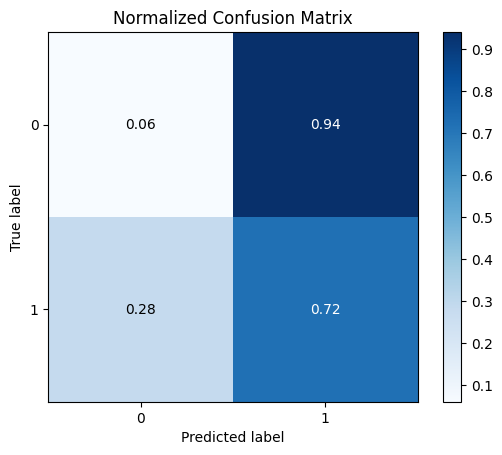

In [105]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 

undersampler = RandomOverSampler(random_state=1)
X_train_under_over, y_train_under_over = undersampler.fit_resample(X_train, y_train)

nb_model =  LogisticRegression()

nb_model.fit(X_train_under_over, y_train_under_over)


# validar com dados de teste
y_pred = nb_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

conf_matrix = confusion_matrix(y_test, y_pred)
precisao_classe = precision_score(y_test, y_pred, average=None)
class_report = classification_report(y_test, y_pred)


# Avaliação do modelo com os dados de teste comparados com os dados reais
print(class_report)


plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()